# Online Monte-Carlo Algorithm and the Windy Grid World Enviroment

## PLEASE RUN THIS: Downloading the environment

In [ ]:
# Downloading the WindyGridWorld environment

!wget -q https://raw.githubusercontent.com/FredAmouzgar/comp8220_ML_2021S1/main/envs.py

## The Windy Grid World

### Our Goal

__In this notebook, we are going to tackle the <font color="blue">Windy Grid World</font> with the Monte-Carlo algorithm.__

### What is the Windy Grid World Environment?
Windy Gridworld as shown below is a standard gridworld, with start and goal states, but with one difference: there is a crosswind running upward through the middle of the grid. The actions are the standard four—up, down, right, and left—but in the middle region the resultant next states are shifted upward by a “wind,” the strength of which varies from column to column. The strength of the wind is given below each column, in number of cells shifted upward. For example, if you are one cell to the right of the goal, then the action left takes you to the cell just above the goal. The optimal path should look like this. ([Sutton, 2018](http://www.incompleteideas.net/book/the-book-2nd.html)) (Why?)

<center><img style="align: center;" src="https://github.com/FredAmouzgar/comp8220_ML_2021S1/raw/main/images/windygrid_actual.png" width=400></center>
<table style="background-color: white; align: center; text-align: center;">
    <tr>
        <td style="text-align: center;">
            <h3>Start State</h3>
        </td>
        <td>
        </td>
        <td style="text-align: center;">
            <h3>Final State</h3>
        </td>
    </tr>
    <tr>
        <td>
            <img src="https://github.com/FredAmouzgar/comp8220_ML_2021S1/raw/main/images/Windy_grid_world.png" width=300>
        </td>
        <td>
            <img src="https://github.com/FredAmouzgar/comp8220_ML_2021S1/raw/main/images/arrow.jpeg" width=20>
        </td>
        <td>
            <img src="https://github.com/FredAmouzgar/comp8220_ML_2021S1/raw/main/images/Windy_grid_world_end.png" width=300>
        </td>
    </tr>
</table>

----

## The Agent

### A random agent in the WindyGridWorld (10 random steps)

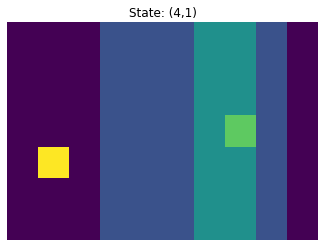

In [ ]:
from envs import WindyGridWorld
from time import sleep
import numpy as np
from IPython.display import clear_output

%matplotlib inline
env = WindyGridWorld()

for i in range(10):
    a = np.random.choice([0,1,2,3])
    env.step(a)
    env.render()
    sleep(1)
    # clear_output(wait=True)

### Constructing an _online First-Visit Monte-Carlo_ Agent for the Windy Grid World

<img style="align: center;" src="https://github.com/FredAmouzgar/comp8220_ML_2021S1/raw/main/images/on-policy_MC_control_edited.PNG" width=800>

__As the training progresses, your agent should get less negative reward, and manages to finish the task sooner.__

# NOTE: Complete all the TODO sections

In [ ]:
import numpy as np
np.random.seed(0)

"""
*** NOTE: Complete all the TODO sections:
"""
class OnPolicy_FirstVisit_MC_Agent:
    def __init__(self, n_states, n_actions, epsilon=1, final_epsilon_value=0.001,
                 gamma=0.9, alpha=0.1, decay_factor=0.0002):
        self.epsilon = epsilon # ε is used for exploration, initially set to 1 for the maximum initial exploration
        self.final_epsilon_value = final_epsilon_value # The final value of the ε. Over time ε decays. 
        self.gamma = gamma # gamma is the discount factor, capturing the importance of future rewards for the agent
        self.alpha = alpha # The learning rate of the agent
        self.n_states = n_states # Number of states in the environment.
        self.n_actions = n_actions # Number of actions in the environment.
        self.decay_factor = decay_factor # The speed of decaying ε
        
        self.all_actions = np.arange(n_actions)
        """
        TODO 1:
          - Initialize Q as a 2D numpy array representing agent's state-action value function.
        """
        self.Q = # Your Code Here (1 line)
        self.policy = self.init_epsilon_soft_policy(n_states, n_actions) # This is just for the sake of illustration

    ##### Redundant Code: Since we are not using the ε-soft policy. This's just an FYI.   
    def init_epsilon_soft_policy(self, n_states, n_actions):
        """
        The init_epsilon_soft_policy method initializes ε=1 which means the probability of each
        action is equal and uniformly distributed
        """
        policy = np.ones((n_states, n_actions), dtype=np.float32) / n_actions
        return policy

    def act_epsilon_soft(self, state):
        """
        The act method takes an action from the ε-soft policy
        """
        return np.random.choice(self.all_actions, p=self.policy[state, :])
    ################################

    def act(self, state, exploration=True):
        """
        TODO 2: if exploration is allowed, do ε-greedy, otherwise, pick the best action
        - For ε-greedy, generate a random number in [0,1) from a function like np.random.rand() and compare it to self.epsilon
            - If the random number is less than ε, act randomly (pick one of the available actions in self.all_actions)
            - Otherwise, act greedily (choose the best action in the state). You can use the np.argmax() method in this process.
        """
        # Your Code Here (~ 7 lines)
        return action
    
    def reset(self):
        self.states, self.actions, self.rewards = [], [], [0]  # Reward's index starts from 1
    
    def update(self, state, action, reward, done):
        """
        TODO 3:
            - This should happend everytime we call the update method: Add state, action and reward to their corresponding lists (Hint: Find them in the reset method).
        """
        # Your Code Here (~ 3 lines)

        if done:
            self.epsilon_decay()
            G = 0
            visited = np.zeros((self.n_states, self.n_actions), dtype=np.int8)
            """
            TODO 4: When the episode is over update your agent using the Monte-Carlo algorithm
                Go in the reverse order and take these steps:
                1- Update G with its update rule from the algorithm (G = γ G + R_{t+1})
                2- Use the current state and action to update the visited variable or *continue* to the next s and a, if visited
                3- Update Q(s, a) with the Monte-Carlo update rule (Q(s,a) = Q(s,a) + α (G - Q(s,a)))
                * Keep those lines at the end (A_optimal and self.policies). They are for visualization purposes. They can also be used in the implementation of ε-soft policy.
            """
            for t in reversed(range(len(self.states))):
                # Your Code Here (~ 8 lines)

                A_optimal = np.argmax(self.Q[s, :])
                self.policy[s,:] = self.epsilon / self.n_actions
                self.policy[s, A_optimal] = 1 - self.epsilon + self.epsilon / self.n_actions
    
    def epsilon_decay(self):
        """
        Todo 5:
            - If self.epsilon is larger than our final value, subtract it from the decay_factor (find these variables in the __init__ method).
            - Otherwise, set it to the final value intended for ε.
        """
        # Your Code Here (~ 4 lines)

### Two Util Functions (Please Do not modify):
- display_status()
- play()

In [ ]:
# Utils - PLEASE DO NOT MODIFY THIS CELL

def display_status(episode, return_episode, epsilon, stime, returns, avg_returns, policy):
    """
    A helper function for displaying agent's behavior
    """
    clear_output(wait=True)
    etime = time()
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
    axes[0].set_title("Episode:" + str(episode) + " - Return:"+str(return_episode)\
              + " - Epsilon:" + str(epsilon)[:5] + " - elapsed time: " + str(etime - stime)[:4])
    axes[0].set_xlabel("Episode")
    axes[0].set_ylabel("Returns (sum of rewards in each episode)")
    axes[0].plot(list(range(len(returns))),returns)
    axes[0].plot(list(range(len(returns))),avg_returns, linewidth=3)
    axes[0].legend(["Returns", "Average Returns"])

    axes[1].imshow((10 * policy).reshape(14, 20))
    axes[1].set_title("A representation of agent's policy")
    axes[1].legend(["0"])
    axes[1].axis("off")
    plt.show()
    
def play(env, agent, episodes=2, exploration=True, tolerance=20):
    for episode in range(episodes):
        env.reset()
        state = env.state
        done = False
        step = 0
        actions = []
        while not done:
            action = agent.act(state, exploration=exploration)
            new_state, reward, done, _ = env.step(action)
            step += 1
            state = new_state
            actions.append(action)
            clear_output(wait=True)
            env.render()
            if done:
                print(f"Done in {step} steps.")
                print(f"Actions: {actions}")
                for a in actions:
                    print(env.actions[a], end=", ")
                print()
                sleep(0.1)
            if step >= tolerance:
                print(f"No Done in {step} steps.")
                break
            sleep(0.1)

## Training an Agent:

### The initial performance of the agent before training

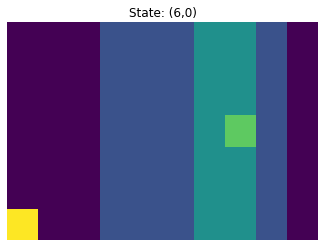

No Done in 20 steps.


In [ ]:
env = WindyGridWorld()
agent = OnPolicy_FirstVisit_MC_Agent(n_states=env.states_n, n_actions=env.actions_n)

play(env, agent, episodes=1, tolerance=20)

### Training the Agent

### The Train Loop

<img style="align: center;" src="https://github.com/FredAmouzgar/comp8220_ML_2021S1/raw/main/images/MDP_loop.jpeg" width=800>

### The Training Process (~ Takes 1 minute)

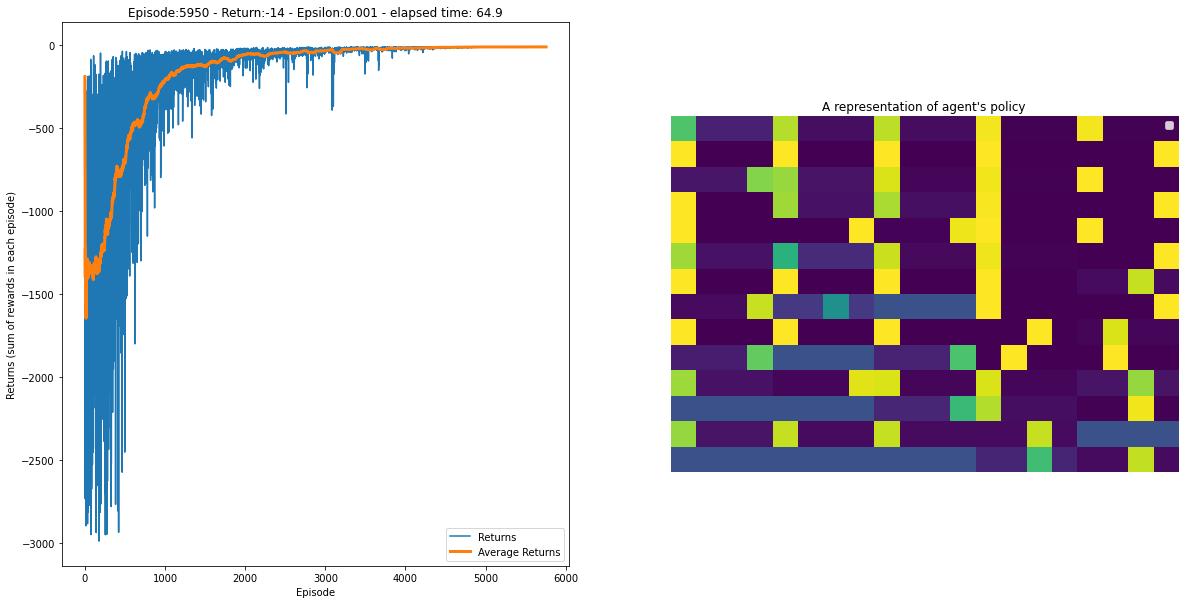

In [ ]:
from envs import WindyGridWorld
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import time

env = WindyGridWorld()
agent = OnPolicy_FirstVisit_MC_Agent(n_states=env.states_n, n_actions=env.actions_n)
EPISODES = 6000 # Training the agent for 6000 episodes
STEPS = 3000
DISPLAY_RESULTS_INTERVAL = 50

returns = []
avg_returns = []
stime = time()
for episode in range(EPISODES):
    """
    TODO 6:
        1- Reset the env. It generates the first state, save it to the state variable
        2- Reset the agent (You don't need to save anything).
        3- Set done to False (it gets updated by the step function from the environment)
    """
    # Your Code Here (~ 3 lines)
    
    return_episode = 0
    for step in range(STEPS):
        """
        TODO 7:
            1- Agent should choose an action
            2- The action is used in the env step function (the step function gives you a tuple of (next_state, action, reward, info))
            3- Use those components from the step to update the agent.
            4- Replace the previous state with the new one.
        """
        # Your Code Here (~ 4 lines)

        return_episode += reward
        if done:
            returns.append(return_episode)
            avg = (sum(returns[-100:]) / 100) if len(returns) > 100 else (sum(returns[-len(returns):]) / len(returns))
            avg_returns.append(avg)
            if episode % DISPLAY_RESULTS_INTERVAL == 0:
                display_status(episode, return_episode, agent.epsilon, stime, returns, avg_returns, agent.policy)
            break

## Watch a Smart Agent!

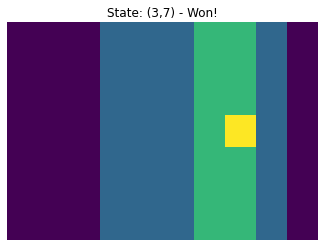

Done in 15 steps.
Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1]
right, right, right, right, right, right, right, right, right, down, down, down, down, left, left, 


In [ ]:
# Change the value of "episodes" variable to a higher number if you want the agent to play more than 1 episode
play(env, agent, episodes=1, exploration=False)

a trained agent should find a path similar to the perdicted optimal policy. <br>
<img style="align: center;" src="https://github.com/FredAmouzgar/comp8220_ML_2021S1/raw/main/images/windygrid_actual.png" width=400>

## More Questions:

__Q1:__ What would happen if we turn the algorithm from one-visit to every-visit?

__Q2 (Programming):__ Use the Monte-Carlo algorithm to train an agent for the OpenAI Gym's Taxi environment.

__*Q3 (Programming):__ _Modify the Windy Gridworld and add King’s Moves_: Re-solve the windygridworld assuming eight possible actions, including the diagonal moves, rather than the usual four. How much better can you do with the extra actions? Can you do even better by including a ninth action that causes no movement at all other than that caused by the wind \[[Sutton2018](http://incompleteideas.net/book/the-book-2nd.html)\]?

__*Q4 (Programming):__ _Stochastic Wind_: Re-solve the windy gridworld task with King’s moves, assuming that the e↵ect of the wind, if there is any, is stochastic, sometimes varying by 1 from the mean values given for each column. That is, a third of the time you move exactly according to these values, as in the previous exercise, but also a third of the time you move one cell above that, and another third of the time you move one cell below that. For example, if you are one cell to the right of the goal and you move left, then one-third of the time you move one cell above the goal, one-third of the time you move two cells above the goal, and one-third of the time you move to the goal \[[Sutton2018](http://incompleteideas.net/book/the-book-2nd.html)\].

<font size="1px">* = harder questions</font>


<font size="1px"><a href="https://www.linkedin.com/in/fredamouzgar/">Fred A.</a> Mar/2021</font>